In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.fft import rfft,fft, ifft, fftshift, fftfreq

In [2]:
# Charger les données
data = np.load("Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz", allow_pickle=True)


In [3]:
print(data)
#print(data['dt_values'])
dt_values = data['dt_values']
#print('dt',type(dt_values))
amplitudes = data['amplitudes']
#l_sup_10_pop = data['l_sup_10_pop'].item()
l10_pop = data['l10_pop'].item()
l11_pop = data['l11_pop'].item()
l3_pop = data['l3_pop'].item()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...


NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500


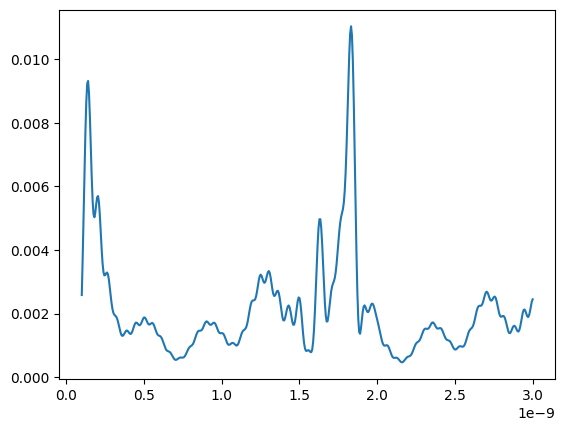

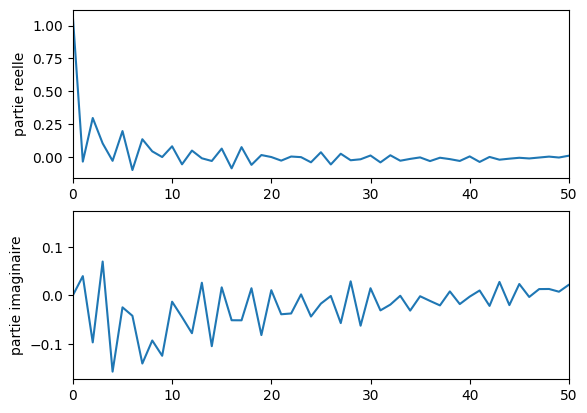

In [15]:
EF_idx = 15
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l10_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)

RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
plt.xlim(0,50)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
plt.xlim(0,50)
plt.show()


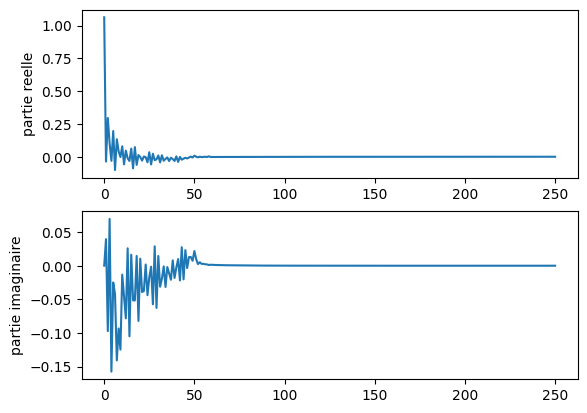

In [5]:
RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(RPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(RPOP))
plt.ylabel("partie imaginaire")

plt.show()

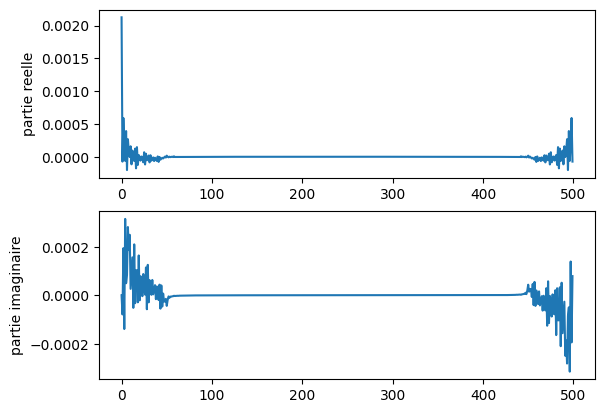

In [6]:
IPOP = ifft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(IPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(IPOP))
plt.ylabel("partie imaginaire")
plt.show()

NpzFile 'Plot/resultats_multi_dt_lin2025-05-14 16:11:22.900820.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 500
[-1.25391047e+00+7.05238128e-01j -2.41693660e+00+3.53899618e+00j
  1.28588951e+00-3.75204749e+00j -4.05338904e-01-1.47355196e+00j
  2.32907757e+00+3.07785158e+00j -1.26586351e-01-9.97202676e-01j
 -2.02727100e+00-2.29078563e-01j  2.03760607e+00+2.27937666e-01j
  4.98384737e-01-8.66837624e-01j -1.02902827e+00+9.60200985e-01j
  9.98845063e-01-7.89978871e-02j  1.38230887e-01-9.37085413e-01j
 -2.53816754e-01+8.51960383e-01j  6.77970485e-01-1.54370966e-02j
 -1.25711180e-01-7.22815800e-01j  9.72586288e-02+5.65617458e-01j
  6.25788110e-01+7.12156749e-02j -2.47702592e-01-3.88898915e-01j
  1.02911831e-01+3.78890256e-01j  6.08259305e-01-4.51527386e-03j
 -1.96458832e-01-1.32190099e-01j  9.06941186e-02+3.63559192e-01j
  5.09616739e-01-7.83689587e-02j -8.26914264e-02+2.60034752e-02j
  1.34930580e-01+4.26207825e-01j  3.50829817e-01-3.22409613e-02j
 -6.12168100e-02+1

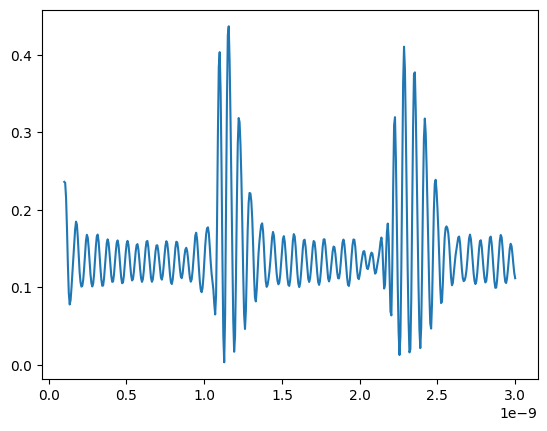

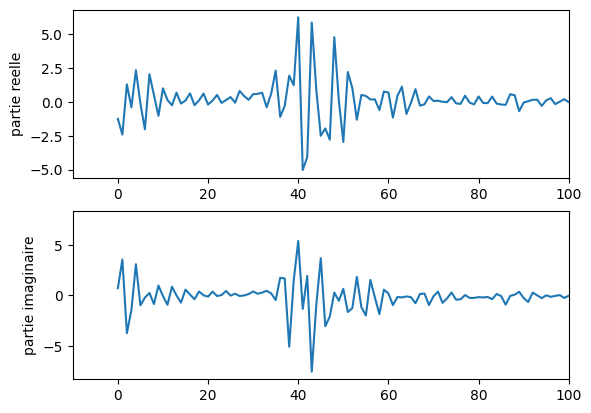

In [69]:
EF_idx = 18
l34_pop = data['l4_pop'].item()
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l34_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)
POP = POP[1:]
print(POP)
print('len=',len(pop))
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
plt.xlim(-10,100)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
plt.xlim(-10,100)
plt.show()


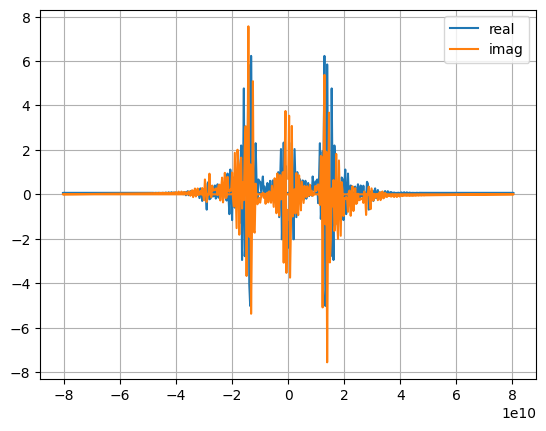

In [70]:
dt_signal = 0.062e-10
n = len(pop)-1
FREQ_POP = fftfreq(n,dt_signal)
plt.plot(FREQ_POP,POP.real, label = "real")
plt.plot(FREQ_POP,POP.imag, label = "imag")
plt.legend()
plt.grid()
#plt.xlim(-4,4)
plt.show()

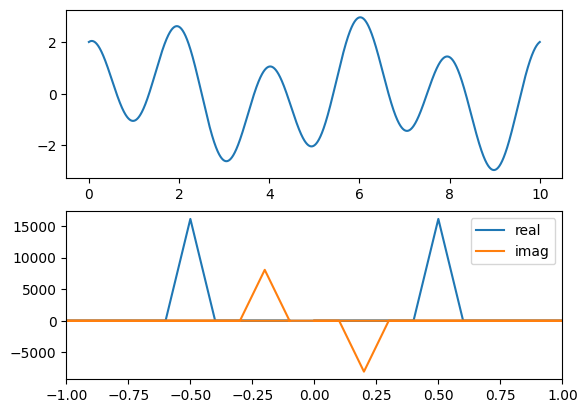

In [10]:
# definition du signal
dt = 0.62e-3
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()
plt.xlim(-1,1)

plt.show()